Title: Titanic - Survival Prediction

Given the features of a passenger, the task is to predict whether they survived the Titanic disaster. This is a binary classification problem where Survived is the target variable. 

>Importing Liberaries & Loading Data >>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")  # Disable all warnings

In [2]:
df = pd.read_csv("/home/anurag/Downloads/tested.csv")

Exploring DataSet ->

>Basic Info

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.shape

(418, 12)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

<Axes: >

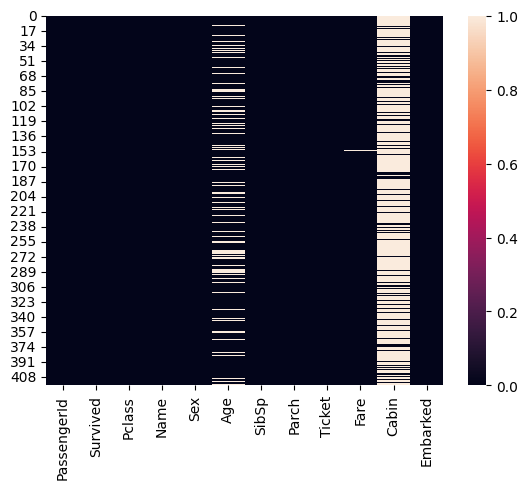

In [10]:
sns.heatmap(df.isnull())

In [11]:
# Numerical and Categorical columns
numerical_cols = ['Age', 'Fare']
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']


>Univeriate Analysis

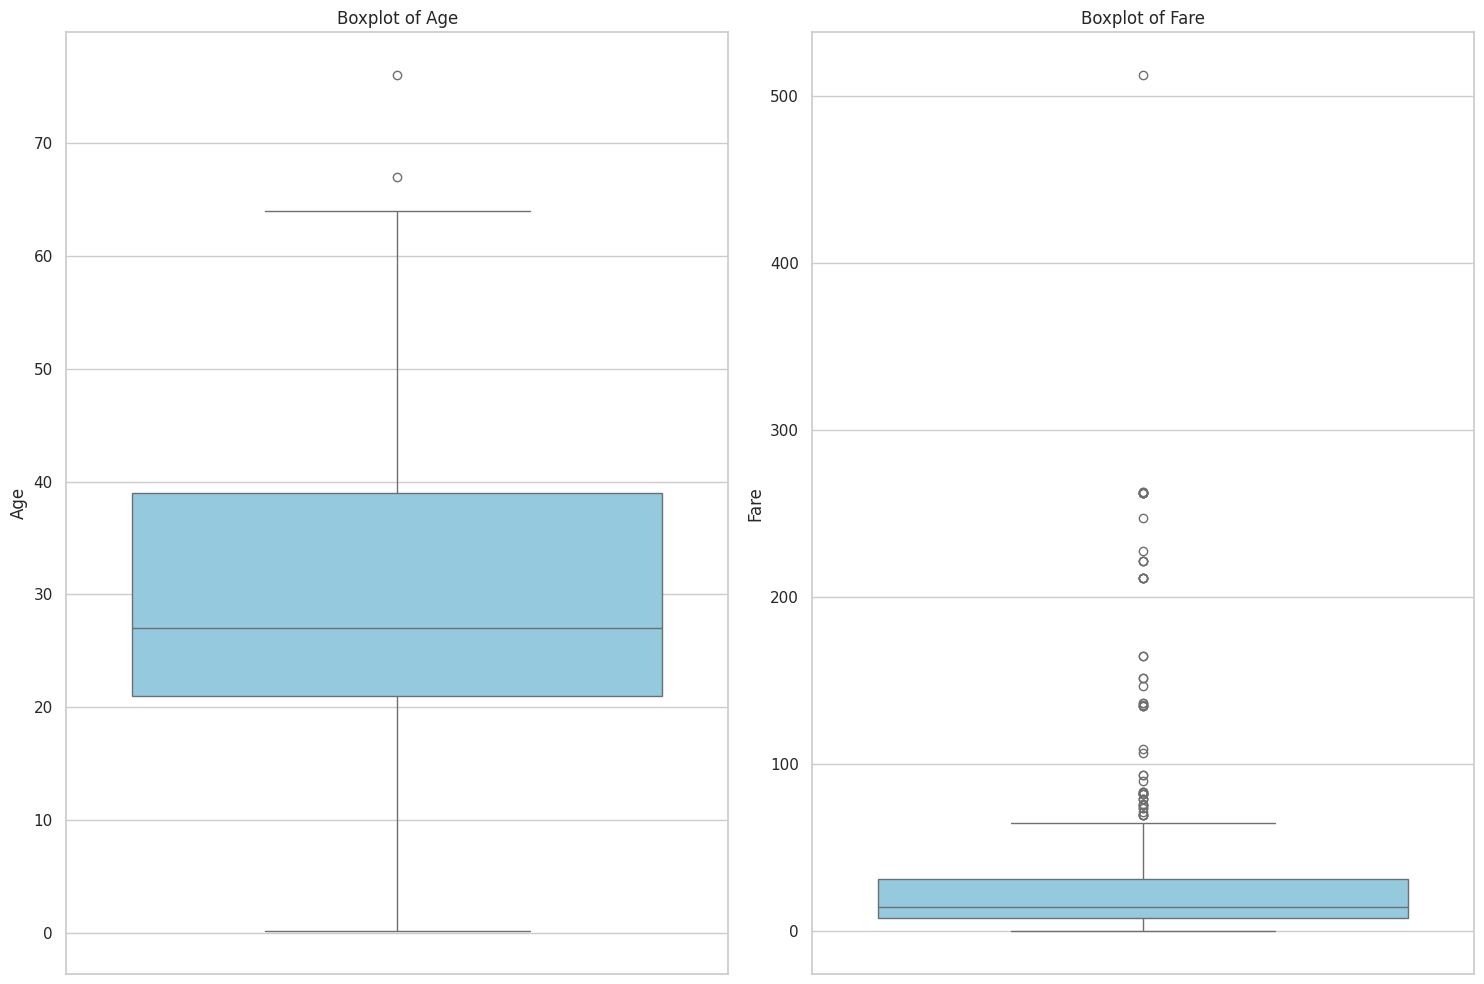

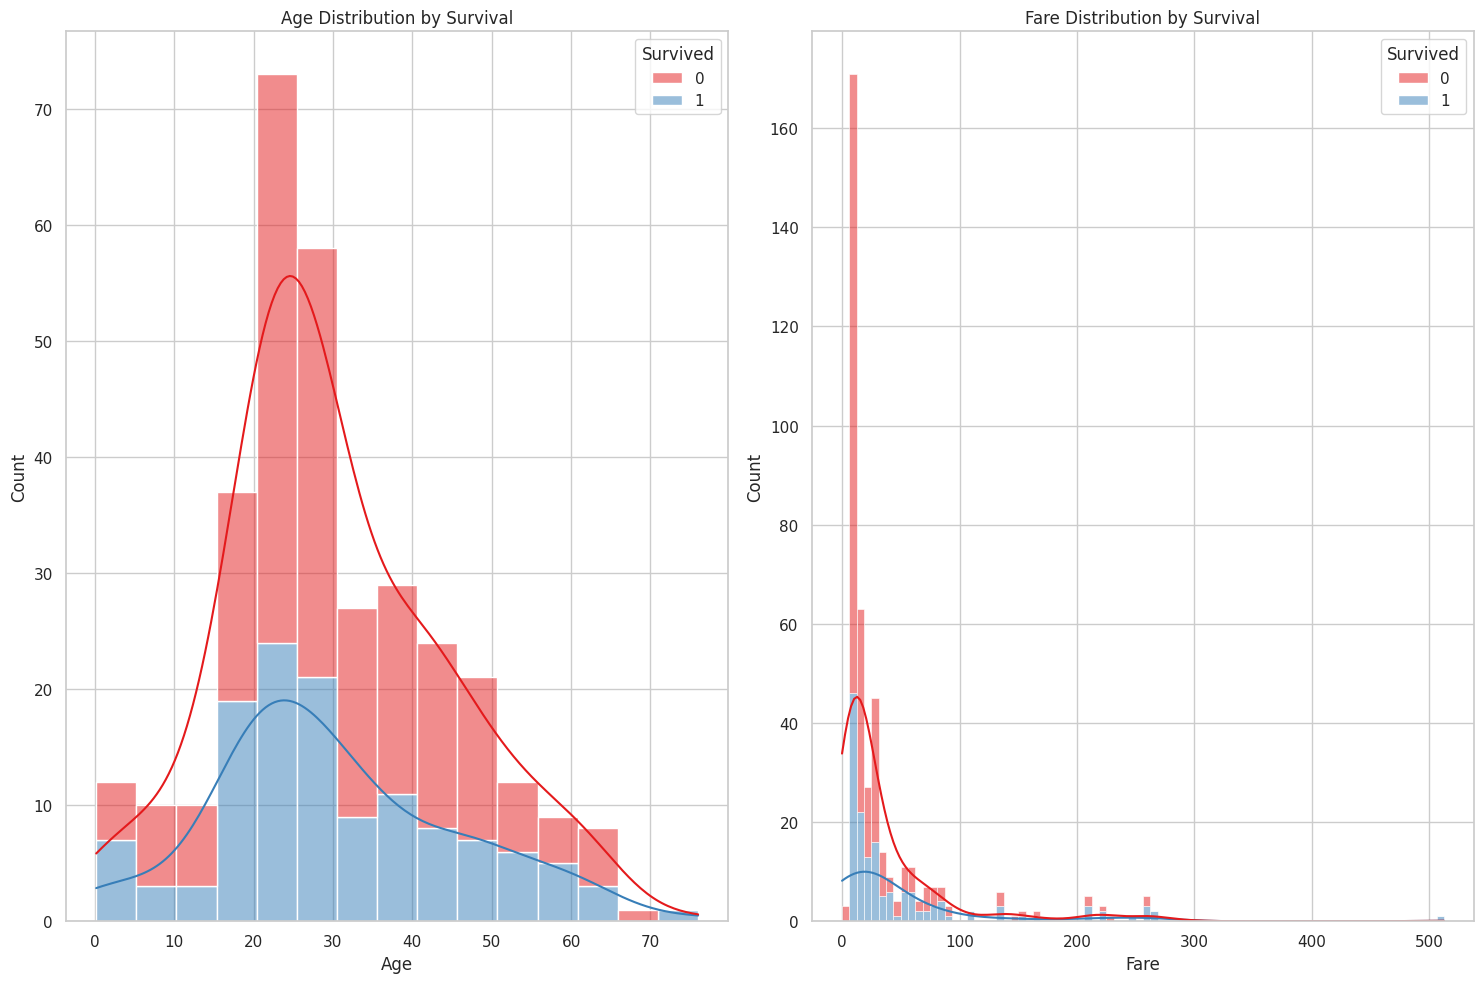

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Survived', kde=True, ax=axes[idx], palette='Set1', multiple='stack')
    axes[idx].set_title(f'{col} Distribution by Survival', fontsize=12)

plt.tight_layout()
plt.show()


>Encoding Analysis

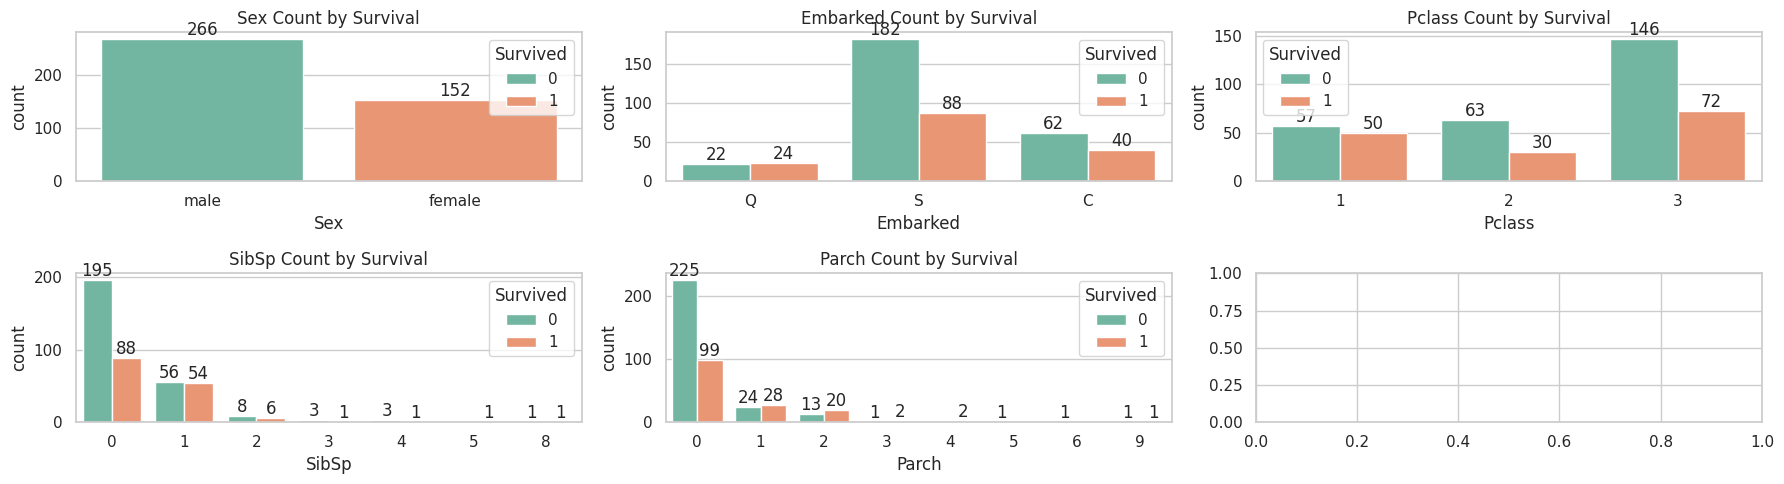

In [13]:
# Countplots of Categorical Features colored by Survived
fig, axes = plt.subplots(2, 3, figsize=(18, 5))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Survived', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} Count by Survival', fontsize=12)
    for container in axes[idx].containers:
        axes[idx].bar_label(container)

plt.tight_layout()
plt.show()


<Axes: >

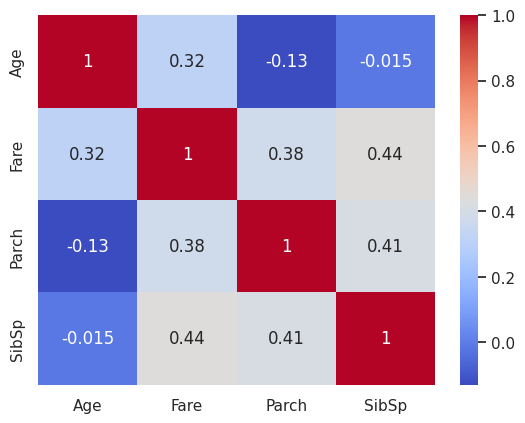

In [14]:
sns.heatmap(df[['Age','Fare','Parch','SibSp']].corr(method="spearman"), annot=True, cmap='coolwarm')

>>Handeling Skewness And normalising the num features

In [15]:
df['Age'] = np.log1p(df['Age'].fillna(0))  # Fill missing Age with 0, as log(0 + 1) = 0
df['Fare'] = np.log1p(df['Fare'].fillna(0))  # Fill missing Fare with 0

# Check skewness again to confirm transformation
from scipy.stats import skew

skew_age = skew(df['Age'])
skew_fare = skew(df['Fare'])

print(f"Skewness of Age after log transformation: {skew_age}")
print(f"Skewness of Fare after log transformation: {skew_fare}")

Skewness of Age after log transformation: -1.0607025155374137
Skewness of Fare after log transformation: 0.7826528112507383


>>Filling Missing Values and Scaling 

In [16]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

>> Transformation And Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for ordinal features (SibSp, Parch, Pclass)
le = LabelEncoder()

df['Pclass'] = le.fit_transform(df['Pclass'])
df['SibSp'] = le.fit_transform(df['SibSp'])
df['Parch'] = le.fit_transform(df['Parch'])

In [19]:
# One-Hot Encoding for Sex, Embarked, Deck
df = pd.get_dummies(df, columns=['Sex', 'Embarked',], drop_first=True)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['SibSp', 'Parch']] = scaler.fit_transform(df[['SibSp', 'Parch']])

>Model Building

>>Feature Selection &  Test Split

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'])  # Dropping irrelevant columns like 'Name' and 'Ticket'
y = df['Survived']
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


>KNN

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Create a dictionary for k values
param_grid = {'n_neighbors': range(1, 21)}  # Testing k = 1 to 20

# GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

# Predict
y_pred = best_knn.predict(X_test)

# Evaluate
from sklearn.metrics import f1_score, classification_report, confusion_matrix

print("Best k:", grid_search.best_params_)
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best k: {'n_neighbors': 7}
F1-Score: 0.9158441558441559
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        85
           1       0.94      0.83      0.88        41

    accuracy                           0.93       126
   macro avg       0.93      0.90      0.92       126
weighted avg       0.93      0.93      0.93       126

Confusion Matrix:
 [[83  2]
 [ 7 34]]


>SVC with RBF

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Define the model
svc = SVC()

# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1,0.2,0.6],        # Regularization
    'gamma': [0.001, 0.01, 0.1], # Kernel coefficient
    'kernel': ['rbf']         # Use only RBF
}

# GridSearchCV
grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Best Model
best_svc = grid.best_estimator_

# Predictions
y_pred = best_svc.predict(X_test)

# Evaluation
print("Best Parameters:", grid.best_params_)
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}
F1-Score: 0.9620253164556962

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        85
           1       1.00      0.93      0.96        41

    accuracy                           0.98       126
   macro avg       0.98      0.96      0.97       126
weighted avg       0.98      0.98      0.98       126


Confusion Matrix:
 [[85  0]
 [ 3 38]]


>Performance Analysis

In [25]:
import pandas as pd

data = {
    "Model": ["KNN (k=7)", "SVC (RBF, C=0.2, γ=0.1)"],
    "F1 Score": [0.916, 0.962],
    "Accuracy": [0.93, 0.98],
    "Precision": [0.93, 0.98],
    "Recall": [0.90, 0.96],
}

comparison_table = pd.DataFrame(data)
display(comparison_table)



,Model,F1 Score,Accuracy,Precision,Recall
0,KNN (k=7),0.916,0.93,0.93,0.90
1,"SVC (RBF, C=0.2, γ=0.1)",0.962,0.98,0.98,0.96


>Conclusion

Based on the evaluation metrics, the SVC model (RBF kernel) significantly outperformed KNN.

    SVC achieved a higher F1 score (0.962 vs 0.916) and accuracy (98% vs 93%).

    It maintained strong precision and recall across both classes, indicating better generalization.

    KNN performed decently but showed slightly lower recall for the minority class (survived), which could impact real-world predictions.

Thus, SVC was selected as the final model for this classification task.